In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 
from sympy import Integral, sin, cos, exp, pi, oo, sqrt
import scienceplots

plt.style.use(['science', 'notebook'])

In [2]:
mu, sigma = sp.symbols(f'\mu, \sigma', positive=True, real=True)
x = sp.symbols(f'x', real=True)

In [3]:
G = Integral(exp(-(x-mu)**2/(2*sigma**2))/(sigma*sqrt(2*pi)),(x,-oo,oo))
G

Integral(sqrt(2)*exp(-(-\mu + x)**2/(2*\sigma**2))/(2*sqrt(pi)*\sigma), (x, -oo, oo))

Initializing sampling constants

In [4]:
n = 1_000_000 # size of the sample
k = 1 # number of standard deviation
mu = 1.2 # the mean
s = 0.2 # the standard deviation
y = np.random.default_rng().normal(mu, s, n)

Creating a distribution function $f(x)$ as a histogram. From now on, $x$ if our variable instead of $y$.

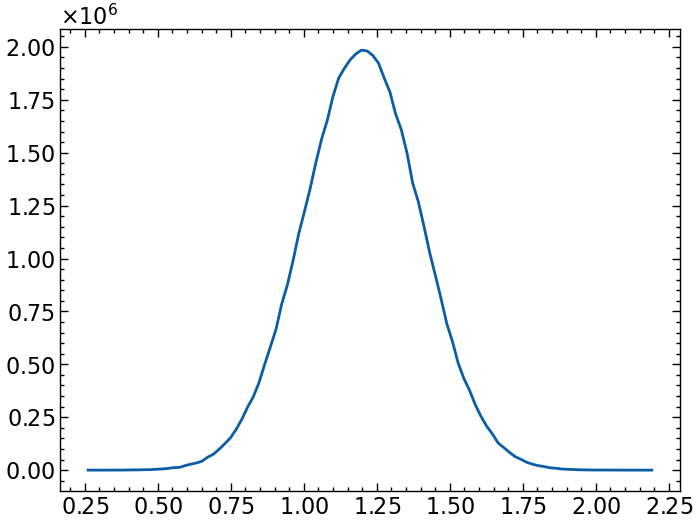

In [5]:
f, x_bins = np.histogram(y, bins=100, density=True)

f *= n
delta = np.diff(x_bins)[0]
x = (x_bins+0.5*delta)[:-1]

plt.plot(x, f)

Testing the normalization of the $f(x)$ as
$$
    n=\int dx\, f(x)\approx\sum_i \Delta x\, f_i
$$

In [6]:
norm = 0
for v in f:
    norm += delta*v

norm

999999.9999999986

For a function $A(x)=x^2/2$, we create the sample $A$ first

In [7]:
def A(x):
    return x**2/2

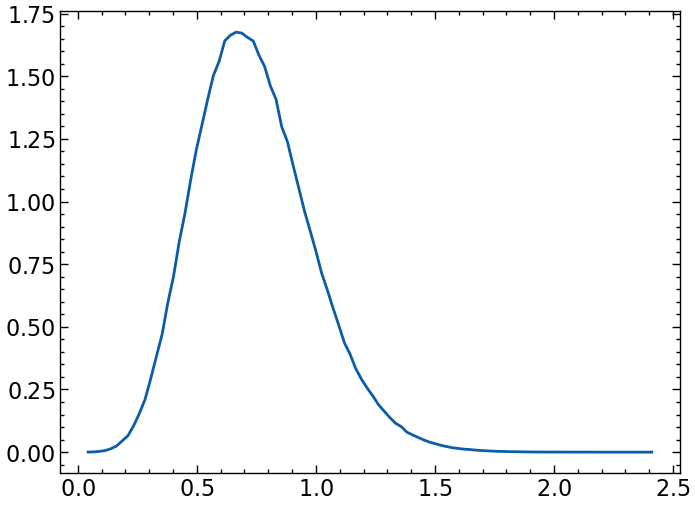

In [8]:
A_sample = A(y)

f_A, x_bins_A = np.histogram(A_sample, bins=100, density=True)

delta_A = np.diff(x_bins_A)[0]
x_A = (x_bins_A+0.5*delta_A)[:-1]

plt.plot(x_A, f_A)

In [9]:
A_sample.mean()

0.740068175059002

Calculate the mean of $A$ as 
$$
    \left<A\right>=\frac{1}{n}\int dx\,A(x)f(x)\approx\frac{1}{n}\sum_{i}\Delta x\,A_i\,f_i.
$$

In [10]:
A_mean = 0
for x_val, f_val in zip(x,f):
    A_mean += delta*A(x_val)*f_val

A_mean /= n
A_mean

0.7400832124512499

The two particle distribution. First, we sample two sets, x and y, with different sizes, means and variances

In [11]:
N = 1_000 # size of x
M = 8_00  # size of y

mu_x, mu_y = 1.2, 0.8 # the mean of x and y
s_x, s_y = 0.2, 0.6 # the standard deviation of x and y
x_smp = np.random.default_rng().normal(mu_x, s_x, N)
y_smp = np.random.default_rng().normal(mu_y, s_y, M)

In [12]:
f_x, x_bins = np.histogram(x_smp, bins=30, density=True)
f_y, y_bins = np.histogram(y_smp, bins=30, density=True)

f_x *= N
dx = np.diff(x_bins)[0]
x = (x_bins+0.5*dx)[:-1]

f_y *= M
dy = np.diff(y_bins)[0]
y = (y_bins+0.5*dy)[:-1]

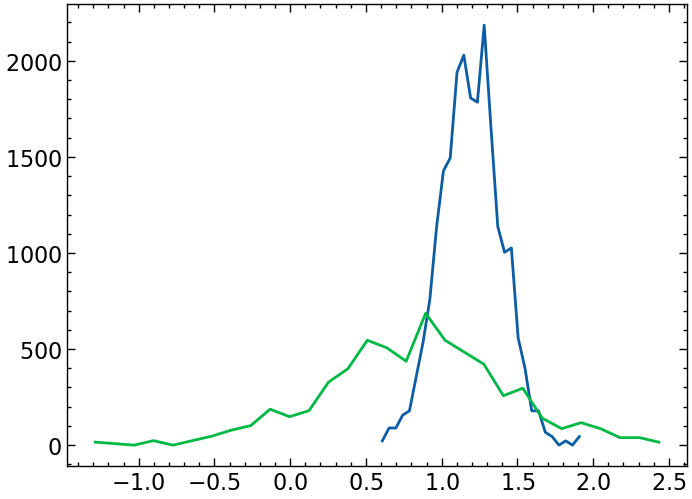

In [13]:
plt.plot(x,f_x)
plt.plot(y,f_y)

We construct a function $B(x,y)=(x-y)^2$

In [14]:
def B(x,y):
    return (x-y)**2

The average is
$$
    \left<B\right>\approx\frac{1}{NM}\sum_i\sum_j\Delta x \Delta y\,B(x_i, y_i)\,f_ig_j
$$

In [15]:
B_mean = 0
for x_val, f_val in zip(x, f_x):
    for y_val, g_val in zip(y, f_y):
        B_mean += B(x_val, y_val)*f_val*g_val

B_mean *= dx*dy/(N*M)

In [16]:
B_mean

0.5327678121637858

In [17]:
B_sample = []
for x_v in x_smp:
    for y_v in y_smp:
        dif = (x_v-y_v)**2
        B_sample.append(dif)

B_sample = np.asarray(B_sample)

In [18]:
B_sample.mean()

0.530720156062305

First, we sample $L$ unit vectors

In [19]:
L = 1_000_000
phi = np.random.default_rng().uniform(0, 2*np.pi, L)
costheta = np.random.default_rng().uniform(-1, 1, L)

In [20]:
f_phi, phi_bins = np.histogram(phi, bins=100, density=True)
f_costheta, t_bins = np.histogram(costheta, bins=100, density=True)

f_phi *= L
f_costheta *= L
dphi = np.diff(phi_bins)[0]
dt = np.diff(t_bins)[0]
phi_val = (phi_bins+0.5*dphi)[:-1]
costheta_val = (t_bins+0.5*dt)[:-1]

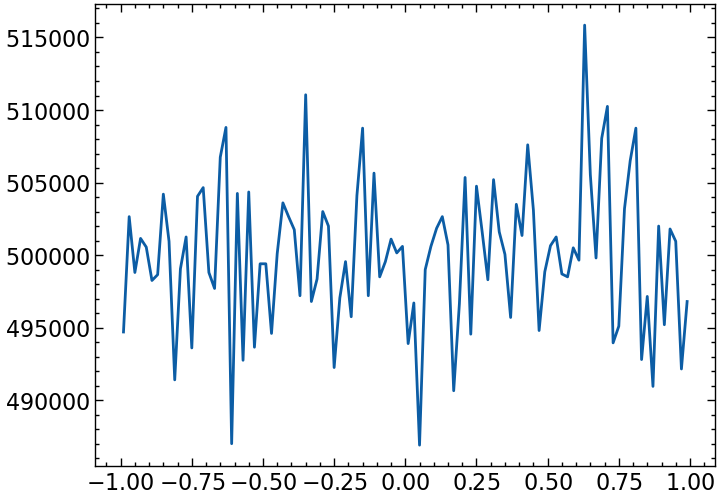

In [21]:
plt.plot(costheta_val, f_costheta)

In [22]:
v_x = np.random.default_rng().normal(0, 1.2, L)
#v_y = np.random.default_rng().normal(0, 1.6, L)
#v_z = np.random.default_rng().normal(0, 0.6, L)

f_vx, vx_bins = np.histogram(v_x, bins=100, density=True)
f_vx *= L
dvx = np.diff(vx_bins)[0]
vx = (vx_bins+0.5*dvx)[:-1]

In [23]:
def C(x, phi, t):
    pass

In [48]:
T = 10
m = 0.34
n = 0.01
N = 1_000_000

vx = np.random.default_rng().normal(0, np.sqrt(T/m), N)
vy = np.random.default_rng().normal(0, np.sqrt(T/m), N)
vz = np.random.default_rng().normal(0, np.sqrt(T/m), N)

In [49]:
def maxwellian1D(density, mass, temperature, v):
    return np.power(density, 1/3)*np.sqrt(mass/(2*np.pi*temperature))*np.exp(-mass*v**2/(2*temperature))

def maxwellian3D(density, mass, temperature, v):
    return density*np.power(mass/(2*np.pi*temperature),3/2)*np.exp(-mass*v**2/(2*temperature))

In [50]:
E_avg = (m/2)*(vx**2+vy**2+vz**2).mean()
E_avg

14.985727319333217

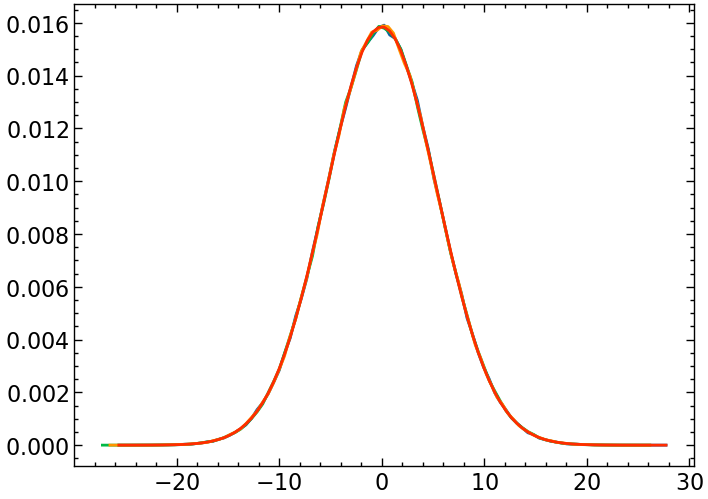

In [54]:
f_vx, vx_bins = np.histogram(vx, bins=100, density=True)
f_vy, vy_bins = np.histogram(vy, bins=100, density=True)
f_vz, vz_bins = np.histogram(vz, bins=100, density=True)

f_vx *= np.power(n, 1/3)
f_vy *= np.power(n, 1/3)
f_vz *= np.power(n, 1/3)

delta_vx = np.diff(vx_bins)[0]
delta_vy = np.diff(vy_bins)[0]
delta_vz = np.diff(vz_bins)[0]
vx_var = (vx_bins+0.5*delta_vx)[:-1]
vy_var = (vy_bins+0.5*delta_vy)[:-1]
vz_var = (vz_bins+0.5*delta_vz)[:-1]

plt.plot(vx_var, f_vx)
plt.plot(vy_var, f_vy)
plt.plot(vz_var, f_vz)
plt.plot(vx_var, maxwellian1D(n, m, T, vx_var))

In [55]:
dist_sum = 0
for x,fx in zip(vx_var, f_vx):
    for y, fy in zip(vy_var, f_vy):
        for z, fz in zip(vz_var, f_vz):
            dist_sum += (x**2+y**2+z**2)*fx*fy*fz

T_dist = (m/(3*n))*delta_vx*delta_vy*delta_vz*dist_sum

In [56]:
T_dist

9.998729324298747

In [57]:
T_sample = (m/3)*(vx**2+vy**2+vz**2).mean()
T_sample

9.990484879555478

In [59]:
v_test = np.array([1,2,3,4,5,6,7,8,9,10])
v_sample_idx = np.array([2,5,7,8])

In [62]:
v_test[v_sample_idx]**2

array([ 9, 36, 64, 81])

In [97]:
p1,p2 = np.random.default_rng().choice(v_test, 2, replace=False)
p1,p2

(10, 8)